### Exploring Fantasy Football data using dimension reduction techniques (PCA, t-SNE)

#### uses this article as a reference:  https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b 
#### data obtained from https://www.pro-football-reference.com/fantasy

In [1]:
import numpy as np
import pandas as pd
import sklearn
import time

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import seaborn as sns

In [5]:
print(sklearn.__version__)

0.20.3


In [79]:
fantasy_game_data = pd.read_csv('QBFantasyGameDataTraining_NoPercents.csv')

In [50]:
fantasy_game_data

G#        Date   Tm  Opp   Result Pos  Ins_20_Pass_Cmp  Ins_20_Pass_Att  \
0     1    9/9/2012  ATL  KAN  W 40-24  QB                6               10   
1     2   9/17/2012  ATL  DEN  W 27-21  QB                4                6   
2     3   9/23/2012  ATL  SDG   W 27-3  QB                4                6   
3     4   9/30/2012  ATL  CAR  W 30-28  QB                2                6   
4     5   10/7/2012  ATL  WAS  W 24-17  QB                3                3   
5     6  10/14/2012  ATL  OAK  W 23-20  QB                1                2   
6     7  10/28/2012  ATL  PHI  W 30-17  QB                6                8   
7     8   11/4/2012  ATL  DAL  W 19-13  QB                1                3   
8     9  11/11/2012  ATL  NOR  L 27-31  QB                7               11   
9    10  11/18/2012  ATL  ARI  W 23-19  QB                2                4   
10   11  11/25/2012  ATL  TAM  W 24-23  QB                4                7   
11   12  11/29/2012  ATL  NOR  W 23-13  QB                1                3   
12   13   12/9/2012  ATL  CAR  L 20-30  QB                5                9   
13   14  12/16/2012  ATL  NYG   W 34-0  QB                3                3   
14   15  12/22/2012  ATL  DET  W 31-18  QB                5                6   
15   16  12/30/2012  ATL  TAM  L 17-22  QB                1                5   
16    1    9/8/2013  ATL  NOR  L 17-23  QB                3                8   
17    2   9/15/2013  ATL  STL  W 31-24  QB                3                4   
18    3   9/22/2013  ATL  MIA  L 23-27  QB                4                9   
19    4   9/29/2013  ATL  NWE  L 23-30  QB                5               15   
20    5   10/7/2013  ATL  NYJ  L 28-30  QB                8               12   
21    6  10/20/2013  ATL  TAM  W 31-23  QB                2                4   
22    7  10/27/2013  ATL  ARI  L 13-27  QB                4                8   
23    8   11/3/2013  ATL  CAR  L 10-34  QB                2                2   
24    9  11/10/2013  ATL  SEA  L 10-33  QB                2                4   
25   10  11/17/2013  ATL  TAM  L 28-41  QB                2                3   
26   11  11/21/2013  ATL  NOR  L 13-17  QB                3                4   
27   12   12/1/2013  ATL  BUF  W 34-31  QB                4                7   
28   13   12/8/2013  ATL  GNB  L 21-22  QB                3                3   
29   14  12/15/2013  ATL  WAS  W 27-26  QB                3                5   
..   ..         ...  ...  ...      ...  ..              ...              ...   
269  15  12/23/2012  CAR  OAK   W 17-6  QB                1                2   
270  16  12/30/2012  CAR  NOR  W 44-38  QB                2                7   
271   1    9/8/2013  CAR  SEA   L 7-12  QB                2                3   
272   2   9/15/2013  CAR  BUF  L 23-24  QB                2                5   
273   3   9/22/2013  CAR  NYG   W 38-0  QB                2                4   
274   4   10/6/2013  CAR  ARI   L 6-22  QB                1                4   
275   5  10/13/2013  CAR  MIN  W 35-10  QB                2                2   
276   6  10/20/2013  CAR  STL  W 30-15  QB                2                3   
277   7  10/24/2013  CAR  TAM  W 31-13  QB                4                5   
278   8   11/3/2013  CAR  ATL  W 34-10  QB                1                3   
279  10  11/18/2013  CAR  NWE  W 24-20  QB                3                4   
280  11  11/24/2013  CAR  MIA  W 20-16  QB                1                2   
281  12   12/1/2013  CAR  TAM   W 27-6  QB                2                4   
282  13   12/8/2013  CAR  NOR  L 13-31  QB                2                6   
283  14  12/15/2013  CAR  NYJ  W 30-20  QB                1                8   
284  15  12/22/2013  CAR  NOR  W 17-13  QB                1                4   
285  16  12/29/2013  CAR  ATL  W 21-20  QB                2                3   
286   2   9/14/2014  CAR  DET   W 24-7  QB                2                4   
287  

In [51]:
y = fantasy_game_data['FantPt']
y

0      32.46
1      18.66
2      21.40
3      24.76
4      18.50
5       9.46
6      24.28
7      14.48
8      26.64
9       1.74
10     15.42
11     10.40
12     19.68
13     22.70
14     29.66
15     14.62
16     19.36
17     22.96
18     15.24
19     22.84
20     18.76
21     21.72
22      9.34
23      6.96
24     12.38
25     14.16
26     12.68
27     16.14
28     12.24
29      8.30
       ...  
269    20.80
270    11.30
271    12.80
272    16.70
273    29.40
274     6.80
275    30.70
276    14.80
277    27.80
278    18.20
279    26.60
280    20.10
281    27.30
282    15.20
283    16.10
284     9.80
285    19.20
286    19.10
287    12.60
288    15.10
289    34.10
290    14.30
291     5.20
292    12.30
293    12.80
294    18.70
295    14.70
296    35.30
297    22.30
298    19.70
Name: FantPt, Length: 299, dtype: float64

In [52]:
fantasy_game_data.shape

(299, 27)

In [53]:
fantasy_game_data.dtypes

G#                   int64
Date                object
Tm                  object
Opp                 object
Result              object
Pos                 object
Ins_20_Pass_Cmp      int64
Ins_20_Pass_Att      int64
Ins_20_Pass_Yds      int64
Ins_20_Pass_TD       int64
Ins_20_Rush_Att      int64
Ins_20_Rush_Yds      int64
Ins_20_Rush_TD       int64
Ins_10_Pass_Cmp      int64
Ins_10_Pass_Att      int64
Ins_10_Pass_Yds    float64
Ins_10_Pass_TD       int64
Ins_10_Rush_Att    float64
Ins_10_Rush_Yds      int64
Ins_10_Rush_TD     float64
Off_Snap_Num       float64
Off_Snap_Pct       float64
Def_Snap_Num       float64
Def_Snap_Pct       float64
ST_Snap_Num          int64
ST_Snap_Pct        float64
FantPt             float64
dtype: object

In [80]:
fantasy_game_data_stripped = fantasy_game_data.drop(['Date','Tm','Opp','Result','Pos'], axis=1)

In [81]:
fantasy_game_data_stripped.shape

(299, 22)

In [83]:
fantasy_game_data_stripped_before_pca = fantasy_game_data_stripped.copy()
fantasy_game_data_stripped_before_pca.shape

(299, 22)

In [84]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(fantasy_game_data_stripped[feat_cols].values)

In [86]:
fantasy_game_data_stripped['pca-one'] = pca_result[:,0]
fantasy_game_data_stripped['pca-two'] = pca_result[:,1]
fantasy_game_data_stripped['pca-three'] = pca_result[:,2]

In [88]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.58722977 0.14922342 0.13204479]


In [90]:
pca.components_.shape

(3, 22)

In [91]:
fantasy_game_data_stripped.columns

Index(['G#', 'Ins_20_Pass_Cmp', 'Ins_20_Pass_Att', 'Ins_20_Pass_Yds',
       'Ins_20_Pass_TD', 'Ins_20_Rush_Att', 'Ins_20_Rush_Yds',
       'Ins_20_Rush_TD', 'Ins_10_Pass_Cmp', 'Ins_10_Pass_Att',
       'Ins_10_Pass_Yds', 'Ins_10_Pass_TD', 'Ins_10_Rush_Att',
       'Ins_10_Rush_Yds', 'Ins_10_Rush_TD', 'Off_Snap_Num', 'Off_Snap_Pct',
       'Def_Snap_Num', 'Def_Snap_Pct', 'ST_Snap_Num', 'ST_Snap_Pct', 'FantPt',
       'pca-one', 'pca-two', 'pca-three'],
      dtype='object')

In [92]:
fantasy_game_data_stripped_before_pca.shape

(299, 22)

#### Useful to know the columns which represent the highest correlation.  In order to not get a "shape" error, must use fantasy_game_data_stripped before "pca*" columns were added.  See this useful post:  https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn  Looks like these are most important: 
1.Ins_10_Pass_Att (95%) 
2.Ins_20_Pass_Yds (93%) 
3.Off_Snap_Num (78%) 
4.Off_Snap_Pct (32%) 
5.Def_Snap_Num (32%)

In [110]:
pd.set_option('display.max_columns', None) #show all column output
display(pd.DataFrame(pca.components_, columns=fantasy_game_data_stripped_before_pca.columns, index = ['pca-one','pca-two','pca-three']))
pd.reset_option('display.max_columns') #reset back to default

G#  Ins_20_Pass_Cmp  Ins_20_Pass_Att  Ins_20_Pass_Yds  \
pca-one    0.001460        -0.000462        -0.005590        -0.047206   
pca-two   -0.011441         0.104784         0.135105         0.934336   
pca-three  0.010927        -0.003713        -0.000851        -0.088277   

           Ins_20_Pass_TD  Ins_20_Rush_Att  Ins_20_Rush_Yds  Ins_20_Rush_TD  \
pca-one         -0.001964         0.002430         0.009795        0.001935   
pca-two          0.053280        -0.000644         0.035537        0.001509   
pca-three       -0.000591         0.006877        -0.022496        0.002570   

           Ins_10_Pass_Cmp  Ins_10_Pass_Att  Ins_10_Pass_Yds  Ins_10_Pass_TD  \
pca-one           0.002005         0.259865         0.003611       -0.002444   
pca-two           0.036673         0.108052         0.003667        0.026131   
pca-three         0.001474         0.957508         0.012357       -0.010819   

           Ins_10_Rush_Att  Ins_10_Rush_Yds  Ins_10_Rush_TD  Off_Snap_Num  \
pca-one          -0.001226         0.000972       -0.000111     -0.787047   
pca-two          -0.002490         0.006184       -0.000910      0.048919   
pca-three        -0.007279        -0.021142       -0.002924      0.176076   

           Off_Snap_Pct  Def_Snap_Num  Def_Snap_Pct  ST_Snap_Num  ST_Snap_Pct  \
pca-one        0.324966      0.320310           0.0          0.0          0.0   
pca-two        0.165056      0.160510           0.0          0.0          0.0   
pca-three     -0.130508     -0.130602          -0.0         -0.0         -0.0   

             FantPt  
pca-one   -0.320046  
pca-two    0.156161  
pca-three  0.093905

In [32]:
fantasy_game_data_stripped['pca-three']

0     -0.307613
1      0.897109
2      2.955341
3      2.294024
4      2.608454
5     -1.146297
6     -0.293642
7     -0.799170
8      6.553347
9     -1.010059
10    -0.838938
11    -3.518357
12    -0.856028
13     0.540321
14    -2.335999
15     1.418157
16     4.657815
17    -0.804945
18     0.211779
19     5.141428
20     6.911791
21    -2.658561
22     5.493629
23    -5.473120
24    -3.104940
25     0.401735
26     0.790997
27     2.158905
28    -1.953002
29    -0.480508
         ...   
269    1.334651
270   -0.061173
271   -2.995525
272    4.193320
273    1.768083
274   -0.159631
275    0.659232
276   -4.468323
277    0.090579
278    0.078649
279   -2.062153
280    1.825432
281   -0.587486
282    0.839110
283    0.861398
284   -5.742998
285    0.819185
286   -0.536258
287   -2.278302
288    0.244978
289    3.367883
290   -2.830617
291   -1.211868
292   -3.510145
293    1.618631
294    2.079613
295    1.207654
296    1.550499
297    4.938917
298   -2.425488
Name: pca-three, Length:

#### "For reproducability of the results" according to the referenced article:

In [33]:
np.random.seed(42)
rndperm = np.random.permutation(fantasy_game_data_stripped.shape[0])

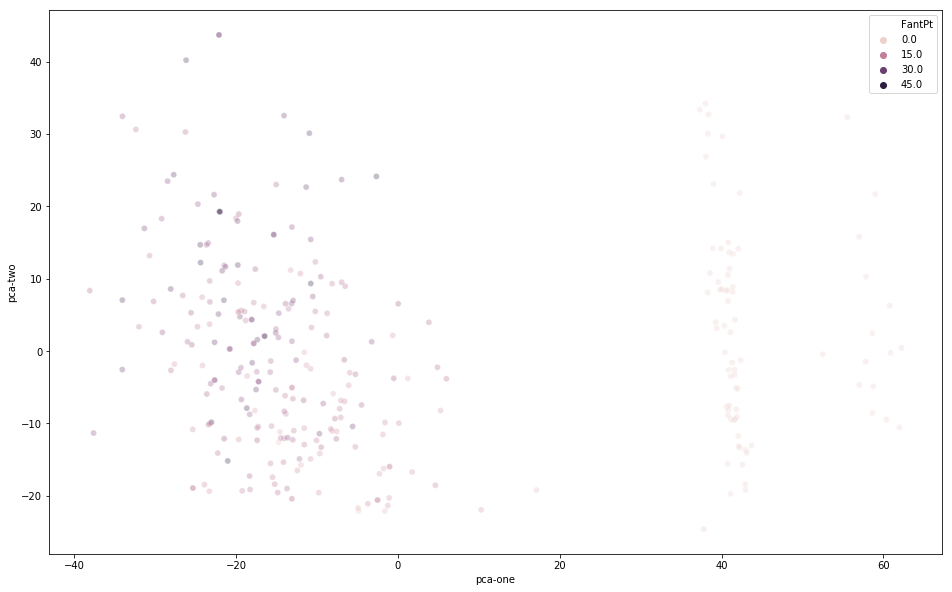

In [34]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    #hue="feat_cols",
    hue = y,
    #palette=sns.color_palette("hls", 27),
    data=fantasy_game_data_stripped.loc[rndperm,:],
    #legend="full",
    alpha=0.3
)

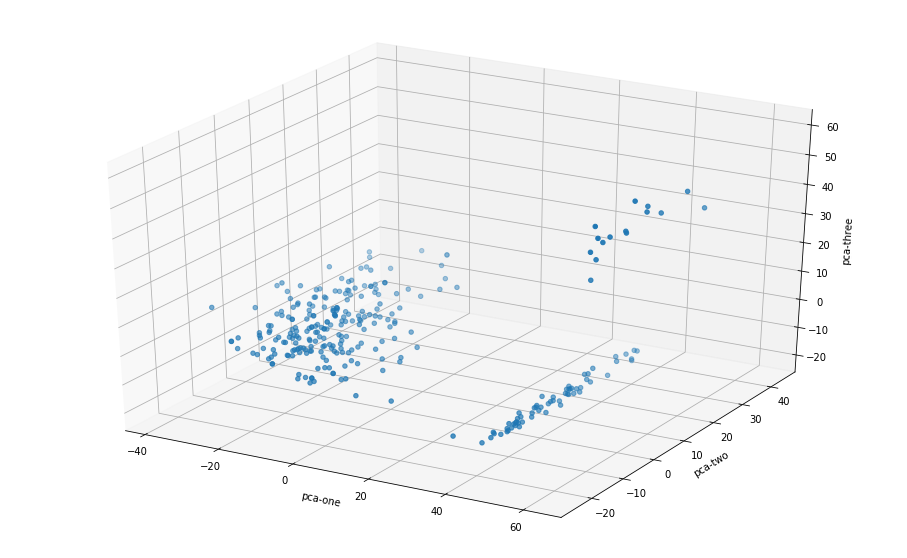

In [35]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs = fantasy_game_data_stripped.loc[rndperm,:]["pca-one"],
    ys = fantasy_game_data_stripped.loc[rndperm,:]["pca-two"],
    zs = fantasy_game_data_stripped.loc[rndperm,:]["pca-three"], #is this right?  it is per the article, but when looking at the plot, it looks like the y and z axis are reversed
    #c = fantasy_game_data_stripped.loc[rndperm,:]["y"],
    cmap = 'tab10',
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [38]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(fantasy_game_data_stripped[feat_cols].values)
print('t-SNE done!  Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 299 samples in 0.005s...
[t-SNE] Computed neighbors for 299 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 299 / 299
[t-SNE] Mean sigma: 6.459670
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.737595
[t-SNE] KL divergence after 1000 iterations: 0.444317
t-SNE done!  Time elapsed: 1.9878566265106201 seconds


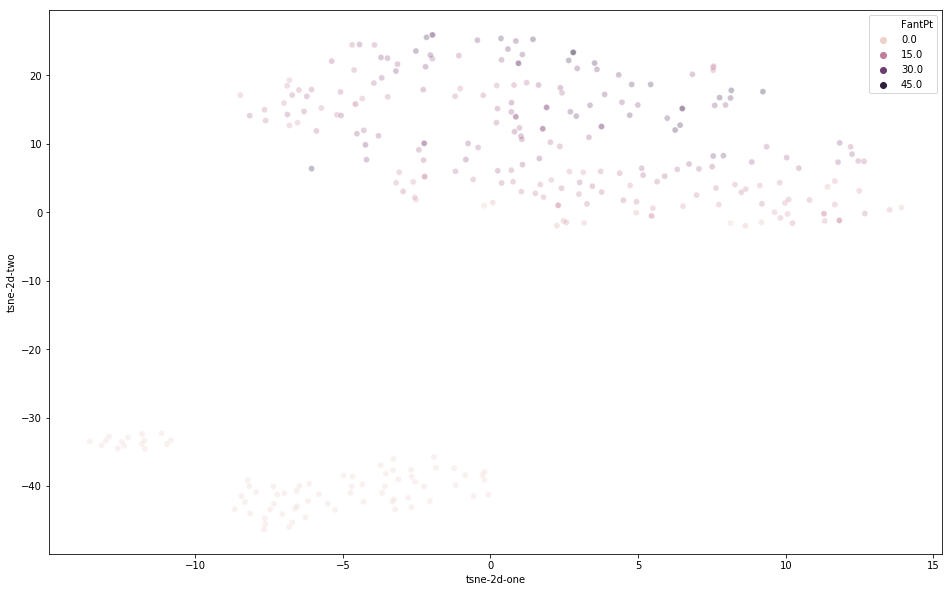

In [42]:
fantasy_game_data_stripped['tsne-2d-one'] = tsne_results[:,0]
fantasy_game_data_stripped['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y,
    #palette=sns.color_palette("hls",10),
    data=fantasy_game_data_stripped,
    #legend="full",
    alpha=0.3
)